In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("../../source_data/ratings.csv")

In [11]:
df

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
...,...,...,...,...
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990


In [12]:
movieId_grouped = df.groupby('movieId')
mean_rating = movieId_grouped.agg(Mean=('rating', 'mean'), Count=('rating', 'count')).sort_values('Mean', ascending=False)
mean_rating.sort_values('Mean', ascending=False)
#movies with a high rating often have one or a low amount of votes

,Mean,Count
movieId,,
147966,5.0,1
169232,5.0,1
114193,5.0,1
168644,5.0,1
151589,5.0,1
...,...,...
169240,0.5,1
150148,0.5,2
150152,0.5,1


In [13]:
mean_vote_all_movies = mean_rating['Count'].mean()
mean_vote_all_movies # average amount of votes per movie

576.8433780339134

In [64]:
p = mean_rating["Mean"] #average review rating
q = mean_rating["Count"] #amount of reviews
Q = 200 #Choosen value to decide which quantity is important
mean_rating["weightedRating"] = 5*(1-np.exp(-(q/Q))) + p

In [65]:
mean_rating.loc[mean_rating["Count"]>50]

,Mean,Count,weightedRating
movieId,,,
159817,4.478780,754,9.363520
318,4.429015,91082,9.429015
170705,4.394366,284,8.185796
171011,4.352632,95,6.243206
858,4.339811,57070,9.339811
...,...,...,...
6587,1.185678,789,6.088922
4775,1.141096,730,6.011140
145096,1.000000,66,2.405381


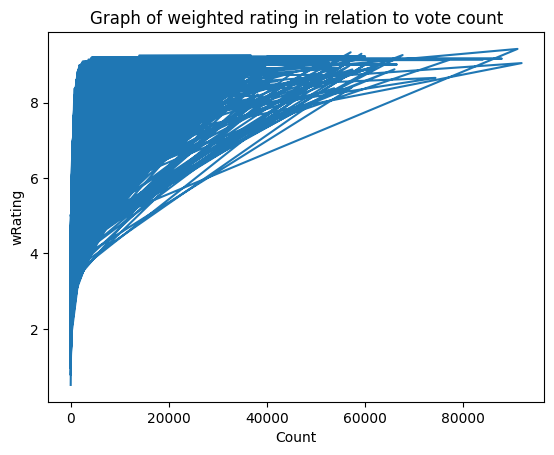

In [37]:

plt.plot(mean_rating['Count'], mean_rating['weightedRating'])
plt.xlabel("Count")
plt.ylabel("wRating")
plt.title("Graph of weighted rating in relation to vote count")
plt.show()

MemoryError: Unable to allocate 15.2 GiB for an array with shape (45115, 45115) and data type int64

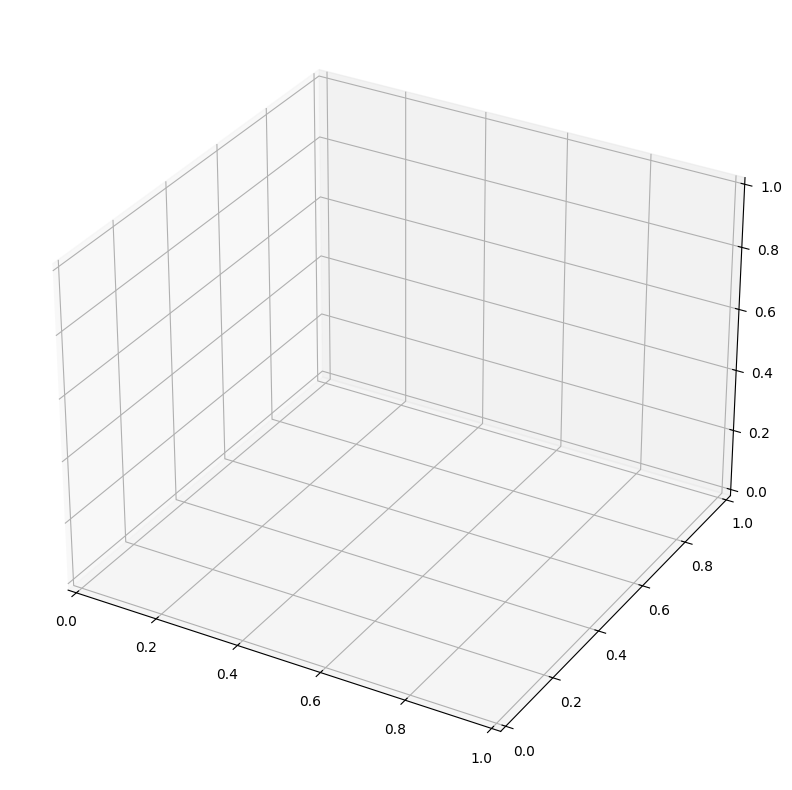

In [39]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

x = mean_rating['Count']
y = mean_rating['weightedRating']

X, Y = np.meshgrid(x, y)
Z = mean_rating["Mean"]

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

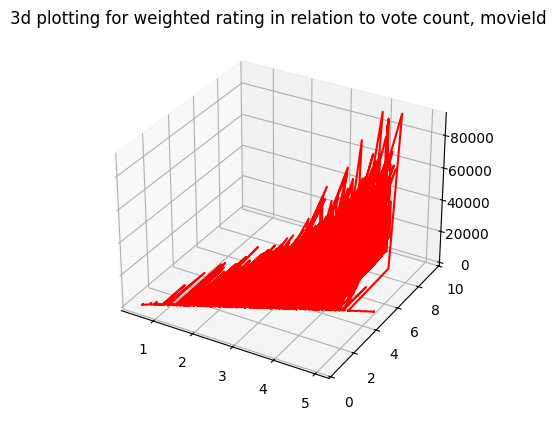

In [41]:
fig1 = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axis
z = mean_rating["Count"]
x = mean_rating["Mean"]
y = mean_rating["weightedRating"]
 
# plotting
ax.plot3D(x, y, z, 'red')
ax.set_title('3d plotting for weighted rating in relation to vote count, movieId')
plt.show()

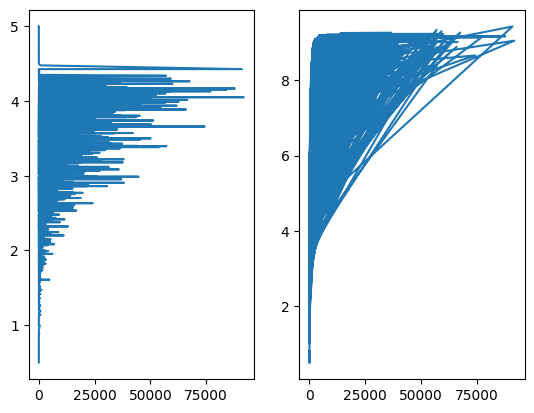

In [43]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
axes[0].plot(mean_rating["Count"], mean_rating['Mean'])

axes[1].plot(mean_rating["Count"], mean_rating['weightedRating'])
